<a href="https://colab.research.google.com/github/FengyiLi1102/100-Days-Of-ML-Code/blob/master/coursework_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coursework 1: Image filtering

In this coursework you will practice image filtering techniques, which are commonly used to smooth, sharpen or add certain effects to images. 
The coursework includes both coding questions and written questions. Please read both the text and code comment in this notebook to get an idea what you are expected to implement.

## What to do?

* Complete and run the code using `jupyter-lab` or `jupyter-notebook` to get the results.

* Export (File | Export Notebook As...) or print (using the print function of your browser) the notebook as a pdf file, which contains your code, results and text answers, and upload the pdf file onto [Cate](https://cate.doc.ic.ac.uk).

* If Jupyter-lab does not work for you, you can also use Google Colab to write the code and export the pdf file.

## Dependencies:

If you do not have Jupyter-Lab on your laptop, you can find information for installing Jupyter-Lab [here](https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html).

There may be certain Python packages you may want to use for completing the coursework. We have provided examples below for importing libraries. If some packages are missing, you need to install them. In general, new packages (e.g. imageio etc) can be installed by running 

`pip3 install [package_name]`

in the terminal. If you use Anaconda, you can also install new packages by running `conda install [package_name]` or using its graphic user interface.

In [1]:
# Import libaries (provided)
import imageio
import numpy as np
import matplotlib.pyplot as plt
import noise
import scipy
import scipy.signal
import math
import time

## 1. Moving average filter.

Read a specific input image and add noise to the image. Design a moving average filter of kernel size 3x3 and 11x11 respectively. Perform image filtering on the noisy image.

Design the kernel of the filter by yourself. Then perform 2D image filtering using the function `scipy.signal.convolve2d()`.

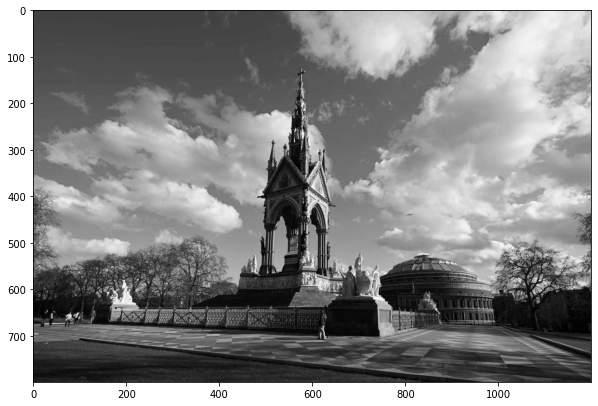

In [2]:
# Read the image (provided)
image = imageio.imread('hyde_park.jpg')
plt.imshow(image, cmap='gray')
plt.gcf().set_size_inches(10, 8)

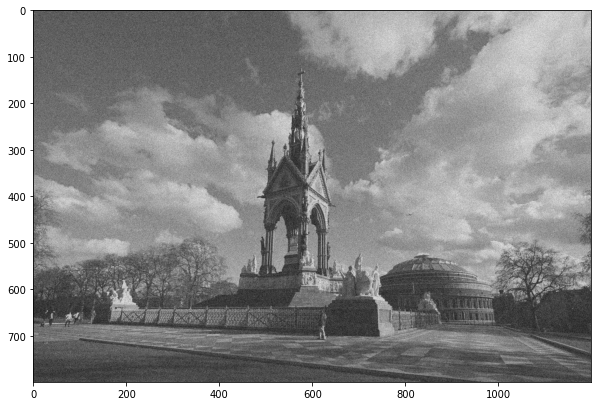

In [3]:
# Corrupt the image with Gaussian noise (provided)
image_noisy = noise.add_noise(image, 'gaussian')
plt.imshow(image_noisy, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### Note: from now on, please use the noisy image as the input for the filters.

### 1.1 Filter the noisy image with a 3x3 moving average filter. Show the filtering results. (5 points)

Filter h:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


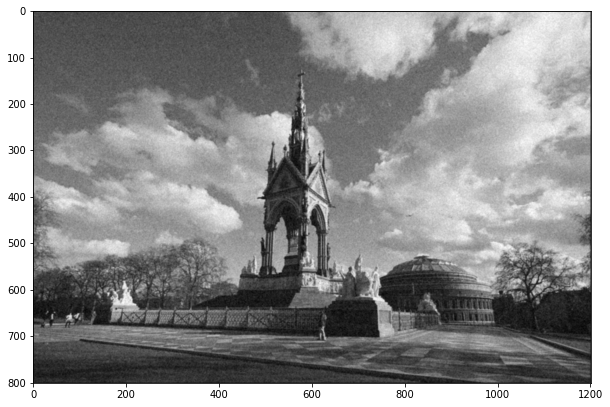

In [4]:
# Design the filter h
h = np.full((3, 3), 1/9)

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy, h)

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### 1.2 Filter the noisy image with a 11x11 moving average filter. (5 points)

Filter h:
[[0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.008

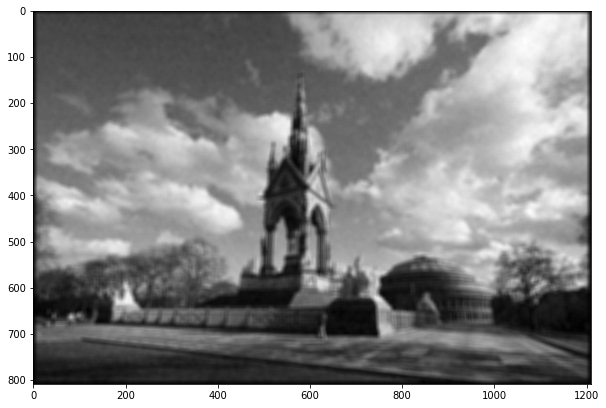

In [5]:
# Design the filter h
h = np.full((11, 11), 1/121)

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy, h)

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### 1.3 Comment on the filtering results. How do different kernel sizes influence the filtering results? (10 points)

For the $3$ x $3$ filter, the median value of the window is calculated to be the result for each pixel on the image, which is the same method in the $11$ x $11$ filter. However, the smaller size filter cannot remove too much noise, which shows a more noisy result than the one filtered by an $11$ x $11$ filter. For a larger size filter, more noise can be removed, but edges of the objects in the image will be blurred out more compared with the image filtered with smaller size filters. This is possibly caused by the reason that more pixels are taken into the calculation for each window when obtaining a mean value. This process will weaken the edge effect for different objects, which gives a more blurred image.

## 2. Edge detection.

Perform edge detection using Prewitt filtering, as well as Gaussian + Prewitt filtering.

### 2.1 Implement 3x3 Prewitt filters and convolve with the noisy image. (10 points)

prewitt_x:
[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]
prewitt_y:
[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


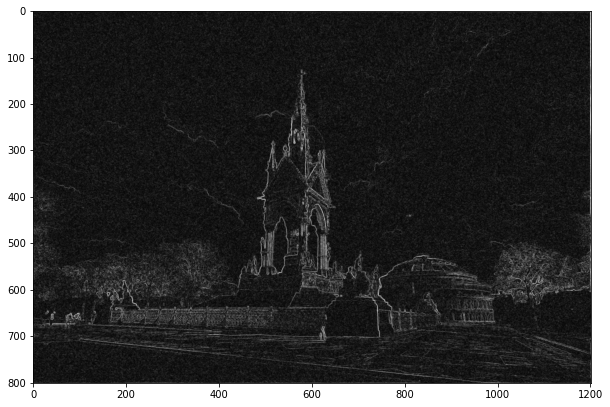

In [6]:
# Design the Prewitt filters
prewitt_x = np.array([[1, 0, -1],
                      [1, 0, -1],
                      [1, 0, -1]])
prewitt_y = np.array([[1, 1, 1],
                      [0, 0, 0],
                      [-1, -1, -1]])

# Prewitt filtering
grad_x = scipy.signal.convolve2d(image_noisy, prewitt_x)
grad_y = scipy.signal.convolve2d(image_noisy, prewitt_y)

# Calculate the gradient magnitude
grad_mag = np.sqrt(grad_x**2 + grad_y**2)

# Print the filters (provided)
print('prewitt_x:')
print(prewitt_x)
print('prewitt_y:')
print(prewitt_y)

# Display the gradient magnitude image (provided)
plt.imshow(grad_mag, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### 2.2 Implement a function that generates a 2D Gaussian filter given the parameter $\sigma$. (10 points)

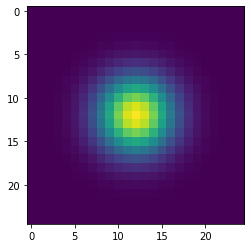

In [31]:
# Design the Gaussian filter
def gaussian_filter_2d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 2D array for the Gaussian kernel
    k = 4
    radius = int(k * sigma)
    size = 2 * radius + 1
    gh = []
    for x in range(-radius, radius+1):
        for y in range(-radius, radius+1):
            gh.append(1 / 2 / np.pi / sigma**2 * np.exp(-(x**2 + y**2) / 2 / sigma**2))
    gh = np.array(gh).reshape(size, size)
    return gh

# Visualise the Gaussian filter when sigma = 3 pixel (provided)
sigma = 3
h = gaussian_filter_2d(sigma)
plt.imshow(h)

### 2.3 Perform Gaussian smoothing ($\sigma$ = 3 pixels), followed by Prewitt filtering, show the gradient magnitude image. (5 points)

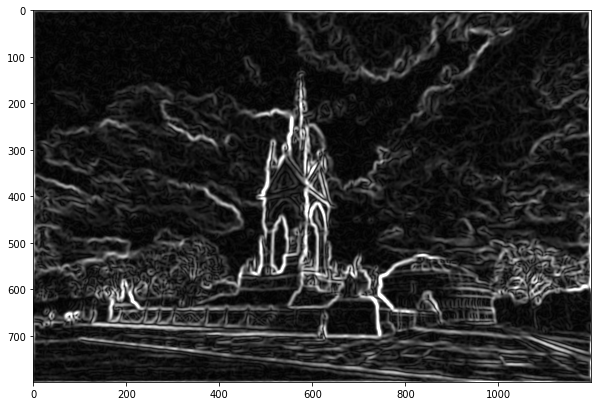

In [8]:
# Perform Gaussian smoothing before Prewitt filtering
sigma = 3
h = gaussian_filter_2d(sigma)
image_gaussian_smoothed = scipy.signal.convolve2d(image_noisy, h, mode='same')

# Prewitt filtering
grad_x = scipy.signal.convolve2d(image_gaussian_smoothed, prewitt_x, mode='same')
grad_y = scipy.signal.convolve2d(image_gaussian_smoothed, prewitt_y, mode='same')

# Calculate the gradient magnitude
grad_mag = np.sqrt(grad_x**2 + grad_y**2)

# Display the gradient magnitude image (provided)
plt.imshow(grad_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(10, 8)

### 2.4 Perform Gaussian smoothing ($\sigma$ = 7 pixels) and evaluate the computational time for Gaussian smoothing. After that, perform Prewitt filtering. (7 points)

Time taken for the Gaussian smoothing is  8.818


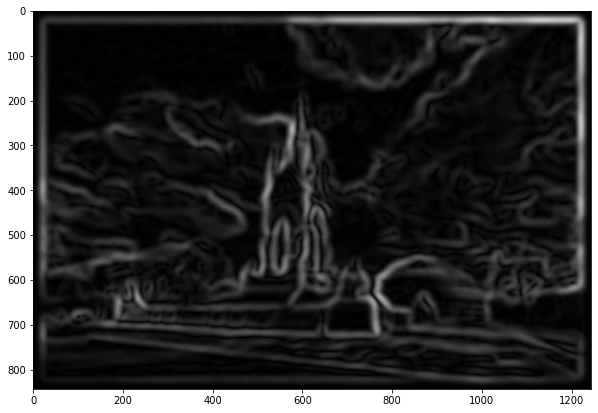

In [9]:
# Construct the Gaussian filter
sigma = 7
gh = gaussian_filter_2d(sigma)

# Perform Gaussian smoothing and count time
start_time = time.time()
image_gaussian_smoothed = scipy.signal.convolve2d(image_noisy, gh)
time_taken = time.time() - start_time
print('Time taken for the Gaussian smoothing is {:6.3f}'.format(time_taken))

# Prewitt filtering
grad_x = scipy.signal.convolve2d(image_gaussian_smoothed, prewitt_x)
grad_y = scipy.signal.convolve2d(image_gaussian_smoothed, prewitt_y)

# Calculate the gradient magnitude
grad_mag = np.sqrt(grad_x**2 + grad_y**2)

# Display the gradient magnitude image (provided)
plt.imshow(grad_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(10, 8)

### 2.5 Implement a function that generates a 1D Gaussian filter given the parameter $\sigma$. Generate 1D Gaussian filters along x-axis and y-axis respectively. (10 points)

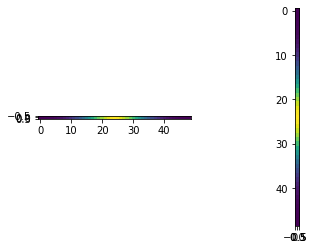

In [30]:
# Design the Gaussian filter
def gaussian_filter_1d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 1D array for the Gaussian kernel
    k = 3.5
    radius = int(k * sigma)
    gh = []
    for x in range(-radius, radius+1):
        gh.append(1 / np.sqrt(2 * np.pi) / sigma * np.exp(-x**2 / 2 / sigma**2))

    return gh

# sigma = 7 pixel (provided)
sigma = 7
sz = 2 * int(3.5 * sigma) + 1

# The Gaussian filter along x-axis. Its shape is (1, sz).
h_x = np.array(gaussian_filter_1d(sigma)).reshape(1, sz)

# The Gaussian filter along y-axis. Its shape is (sz, 1).
h_y = np.array(gaussian_filter_1d(sigma)).reshape(sz, 1)

# Visualise the filters (provided)
plt.subplot(1, 2, 1)
plt.imshow(h_x)
plt.subplot(1, 2, 2)
plt.imshow(h_y)

### 2.6 Perform Gaussian smoothing ($\sigma$ = 7 pixels) using two separable filters and evaluate the computational time for separable Gaussian filtering. After that, perform Prewitt filtering, show results and check whether the results are the same as the previous one without separable filtering. (9 points)

Time taken is  0.076


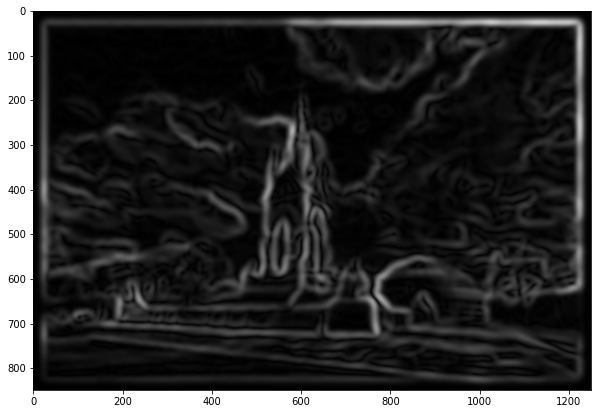

In [11]:
# Perform separable Gaussian smoothing and count time
start_time = time.time()
image_gaussian_smoothed_x = scipy.signal.convolve(image_noisy, h_x)
image_gaussian_smoothed_x_y = scipy.signal.convolve(image_gaussian_smoothed_x, h_y)
time_taken = time.time() - start_time
print('Time taken is {:6.3f}'.format(time_taken))

# Prewitt filtering
grad_x = scipy.signal.convolve2d(image_gaussian_smoothed_x_y, prewitt_x)
grad_y = scipy.signal.convolve2d(image_gaussian_smoothed_x_y, prewitt_y)

# Calculate the gradient magnitude
grad_mag2 = np.sqrt(grad_x**2 + grad_y**2)

# Display the gradient magnitude image (provided)
plt.imshow(grad_mag2, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(10, 8)

# Check the difference between the current gradient magnitude map
# and the previous one produced without separable filtering. You
# can report the mean difference between the two.


### 2.7 Comment on the Gaussian + Prewitt filtering results and the computational time. (9 points)

Applying Gaussian filtering can smooth the image and remove the noice, but the detail in the image will be lost during the smoothing because several points will be taken to calculate a resultant value under the Gaussian distribution model. Prewitt filtering can detect edges and show an image with clear edges around the objects. Using separable filters along x-axis and y-axis can speed up the computational time by a large amount of 6.125s because the time complexity for ($2kσ+1$ * $2kσ+1$) filter is O($N^2$$K^2$) and for the combination of ($2kσ+1$, $1$) and ($1$, $2kσ+1$) filters is O($N^2$$K$) which is much smaller than the former one when $K$ is large.


## 3. Challenge: Implement a 2D Gaussian filter using Pytorch.

[Pytorch](https://pytorch.org/) is a machine learning framework that supports filtering and convolution.

The [Conv2D](https://pytorch.org/docs/stable/nn.html#conv2d) operator takes an input array of dimension NxC1xXxY, applies the filter and outputs an array of dimension NxC2xXxY. Here, since we only have one image with one colour channel, we will set N=1, C1=1 and C2=1. You can read the documentation of Conv2D for more detail.

In [12]:
# Import libaries (provided)
import torch

### 3.1 Expand the dimension of the noisy image into 1x1xXxY and convert it to a Pytorch tensor. (7 points)

In [32]:
# Expand the dimension of the numpy array
from PIL import Image
image_expanded = image_noisy.reshape(1, 1, image_noisy.shape[0], image_noisy.shape[1])

# Convert to a Pytorch tensor using torch.from_numpy
image_tensor = torch.from_numpy(image_expanded)

torch.Size([1, 1, 799, 1200])


### 3.2 Create a Pytorch Conv2D filter, set its kernel to be a 2D Gaussian filter. (7 points)

In [33]:
# A 2D Gaussian filter when sigma = 3 pixel (provided)
sigma = 3
h = gaussian_filter_2d(sigma)
print(h.shape)

# Create the Conv2D filter (provided)
conv = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=h.shape, padding='same', bias=False)

# Set the kernel weight
h_tensor = torch.from_numpy(h)
h_expanded = h_tensor.expand(conv.weight.size())
conv.weight = torch.nn.Parameter(h_expanded, requires_grad=False)

(25, 25)
torch.Size([1, 1, 25, 25])


### 3.3 Apply the filter to the noisy image tensor and display the output image. (6 points)

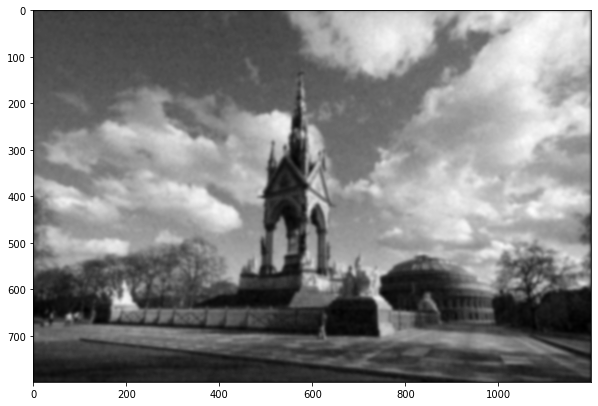

In [34]:
# Filtering
image_filtered = conv(image_tensor)
image_filtered = image_filtered.permute(0, 2, 3, 1).\
reshape([image_filtered.shape[2], image_filtered.shape[3]])
image_filtered = image_filtered.data.numpy()

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(10, 8)

## 4. Survey: How long does it take you to complete the coursework?

In [ ]:
print("10h")